In [1]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np

In [2]:
diabetes_df=pd.read_csv("diabetes.csv")

In [3]:
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
diabetes_df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
diabetes_df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

DATA VISUALIZATION

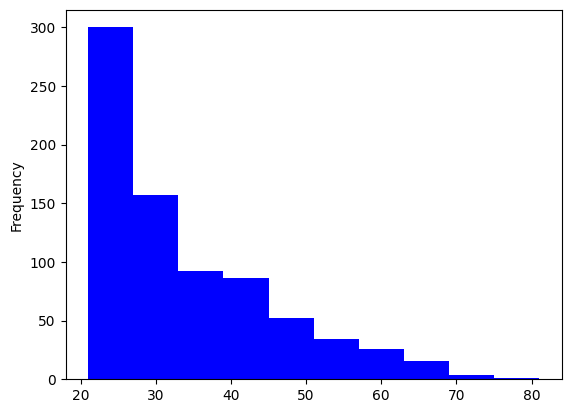

In [7]:
diabetes_df.Age.plot(color="blue",kind="hist")
plt.show()

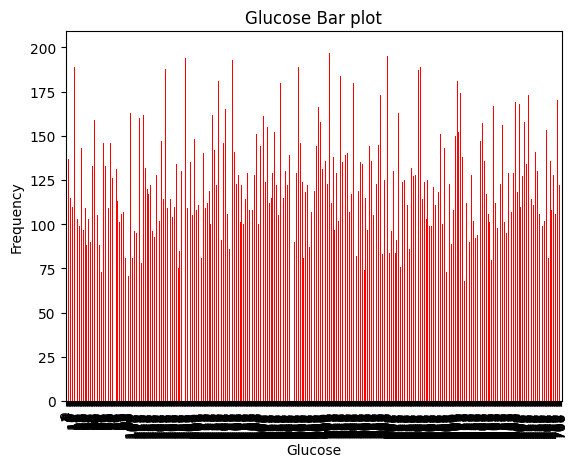

In [8]:
diabetes_df.Glucose.plot(color="red",kind="bar")
plt.xlabel("Glucose")
plt.ylabel("Frequency")
plt.title("Glucose Bar plot")
plt.show()

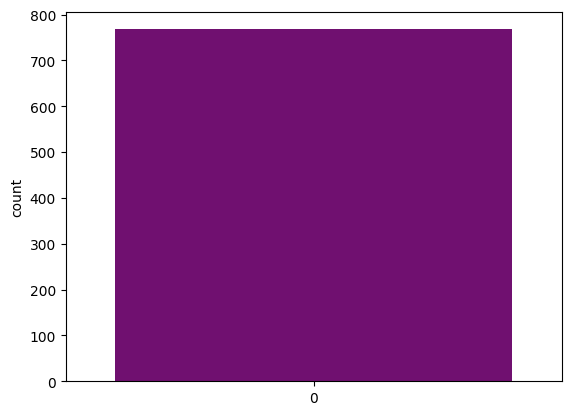

In [9]:
sns.countplot(diabetes_df["Glucose"],color="purple")
plt.show()

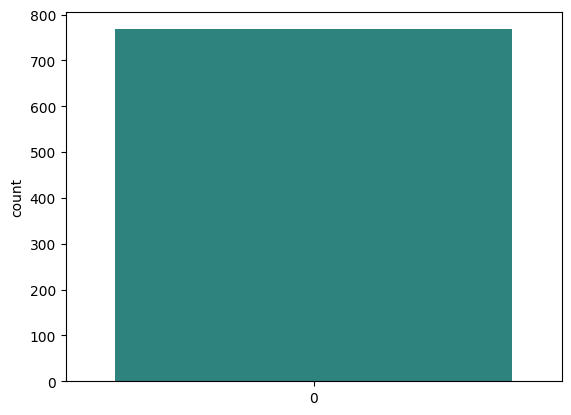

In [10]:
sns.countplot(diabetes_df["Pregnancies"],palette="viridis")
plt.show()

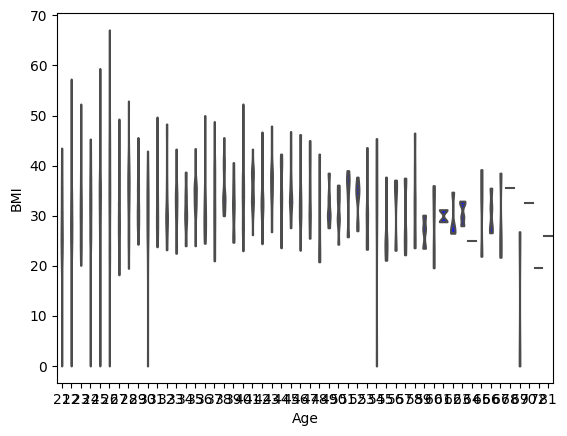

In [11]:
sns.violinplot(diabetes_df,x="Age",y="BMI",color="blue",split=False,cut=0,bw=.3,inner="stick")
plt.show()

In [12]:
diabetes_df["Pregnancies"].value_counts()

Pregnancies
1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: count, dtype: int64

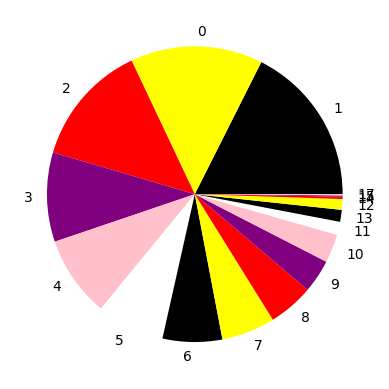

In [13]:
sizes=diabetes_df.Pregnancies.value_counts().values
labels=diabetes_df.Pregnancies.value_counts().index
colors=["black","yellow","red","purple","pink","white"]
plt.pie(sizes,data=diabetes_df,labels=labels,colors=colors)
plt.show()

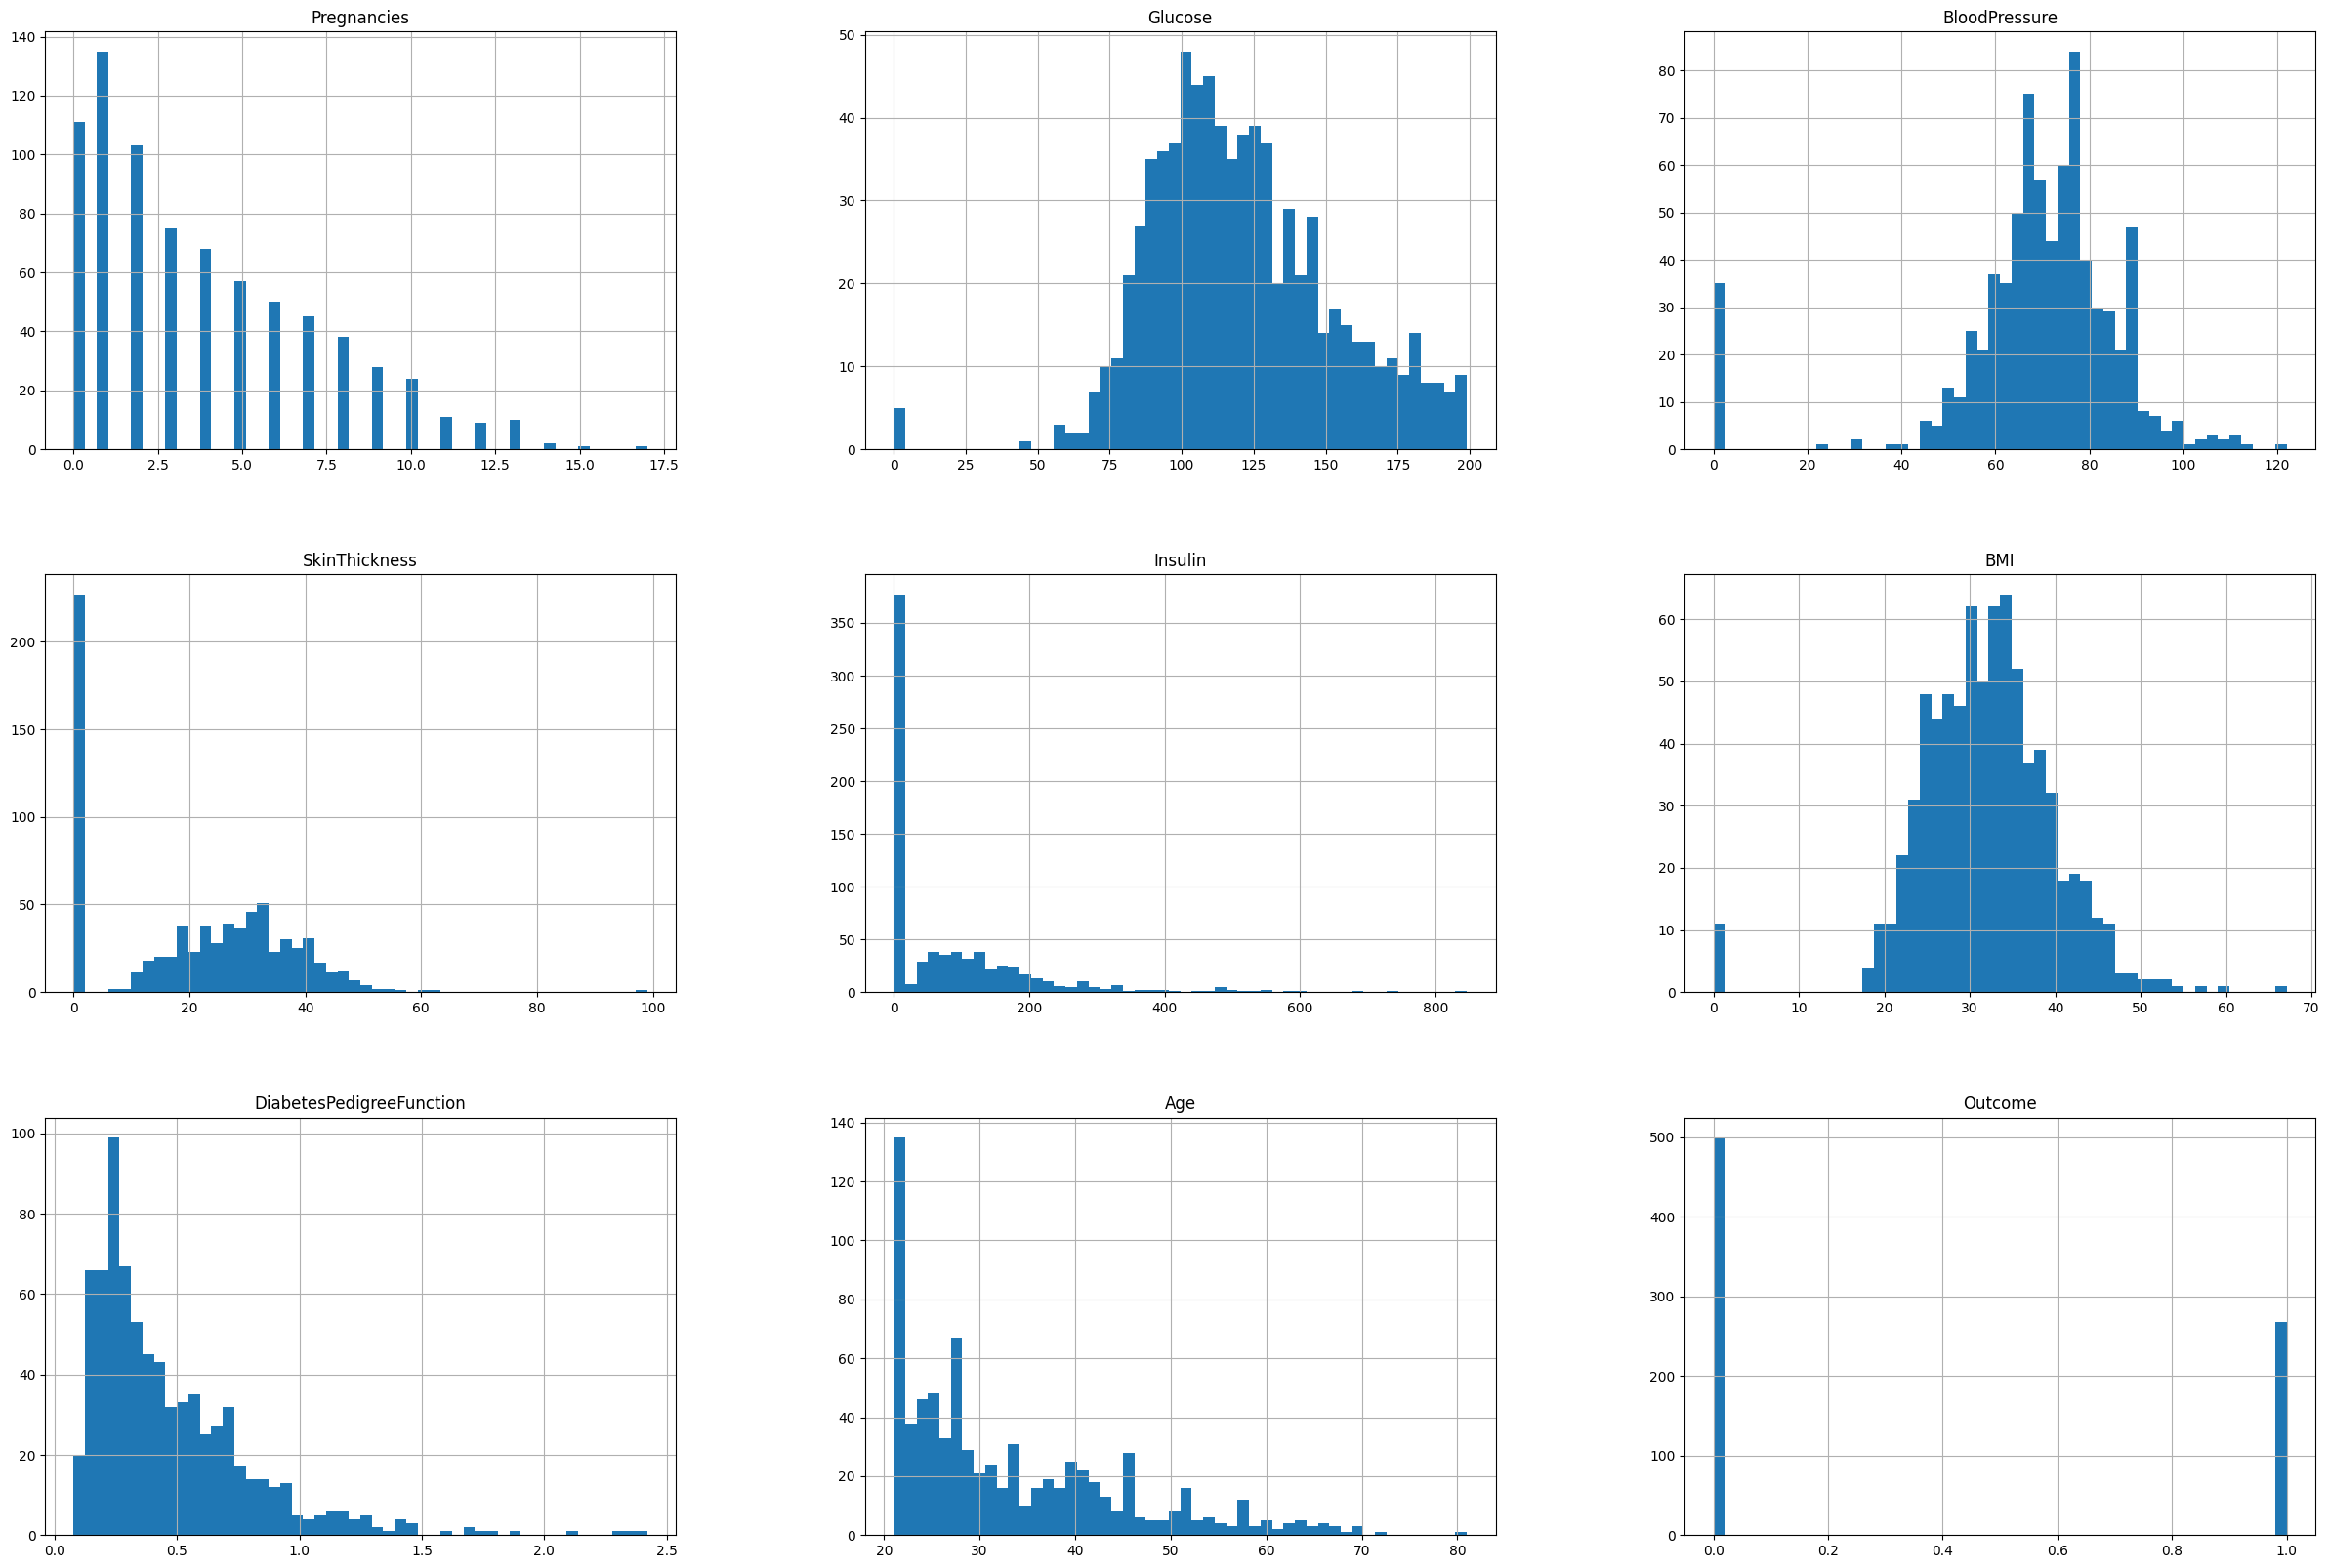

In [14]:
diabetes_df.hist(bins=50,figsize=(30,20))
plt.show()

In [15]:
corr_matrix=diabetes_df.corr()
corr_matrix["Outcome"].sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64

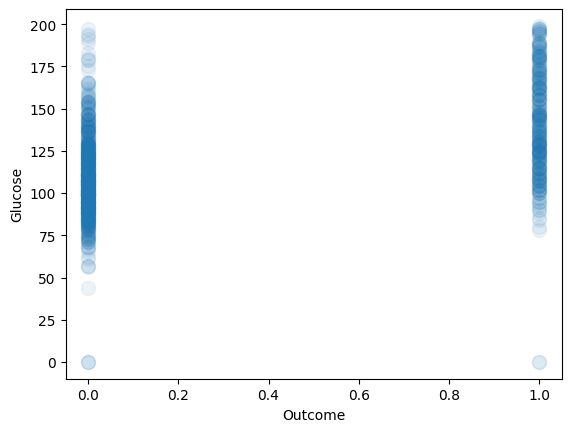

In [16]:
diabetes_df.plot(kind="scatter",x="Outcome",y="Glucose",s=100,alpha=0.08)
plt.show()

from the above we can conclude that Glucose is significant in our research.

PREPARE THE DATA

In [17]:
from sklearn.model_selection import train_test_split

train_df, test_df=train_test_split(diabetes_df,test_size=0.1,random_state=42) # Create, random train and test

train_df_labels=train_df["Outcome"].copy()

#Drop labels
train_df=train_df.drop("Outcome",axis=1)

In [18]:
#Transformation Pipelines

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

#This method makes normalization to our features

num_pipeline = Pipeline([('std_scaler', StandardScaler()), ])

train_prepared=num_pipeline.fit_transform(train_df)

PREDICTION

STOCHASTIC GRADIENT DESCENT (SGD)

In [19]:
from sklearn.linear_model import SGDClassifier

sgd_cl=SGDClassifier(random_state=42)
sgd_cl.fit(train_prepared,train_df_labels)

SGDClassifier(random_state=42)

In [20]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_cl, train_prepared, train_df_labels, cv= 3, scoring='accuracy')

array([0.72727273, 0.67391304, 0.69130435])

In [21]:
prediction = sgd_cl.predict(train_prepared)
print("SGD Accuracy of Classifier: ", sgd_cl.score(train_prepared, train_df_labels))

SGD Accuracy of Classifier:  0.6497829232995659


Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(train_prepared, train_df_labels)

LogisticRegression()

In [23]:
from sklearn.model_selection import cross_val_score

cross_val_score(model, train_prepared, train_df_labels, cv= 3, scoring='accuracy')

array([0.77922078, 0.77391304, 0.72173913])

In [24]:
prediction = model.predict(train_prepared)
print("LR Accuracy of Classifier: ", model.score(train_prepared, train_df_labels))

LR Accuracy of Classifier:  0.7756874095513748


In [25]:
from sklearn.svm import SVC 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

poly_kernel_svm_clf = Pipeline([ ("scaler", StandardScaler()), 
                                ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
]) 

poly_kernel_svm_clf.fit(train_prepared, train_df_labels)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=1, kernel='poly'))])

In [26]:
print("SVM Accuracy of Classifier: ", poly_kernel_svm_clf.score(train_prepared, train_df_labels))

SVM Accuracy of Classifier:  0.8451519536903039


In [27]:
from sklearn.model_selection import cross_val_predict 
y_train_pred = cross_val_predict(poly_kernel_svm_clf, train_prepared, train_df_labels, cv=3)

CONFUSION MATRIX

In [28]:
from sklearn.metrics import confusion_matrix

confusion_matrix(train_df_labels, y_train_pred)

array([[375,  75],
       [109, 132]], dtype=int64)

Precision = TP/(TP+FP) 132/(132+58)
Recall = TP/(TP+FN) 132/(132+109)
F1 Score = 2 x (precision x recall )/ (precision+recall)

In [29]:
from sklearn.metrics import precision_score, recall_score, f1_score

print('Precision Score:',precision_score(train_df_labels, y_train_pred))
print('Recall Score:',recall_score(train_df_labels, y_train_pred))
print('F1 Score:',f1_score(train_df_labels, y_train_pred))

Precision Score: 0.6376811594202898
Recall Score: 0.5477178423236515
F1 Score: 0.5892857142857143


ROC CURVE 

In [30]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(train_df_labels, y_train_pred)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


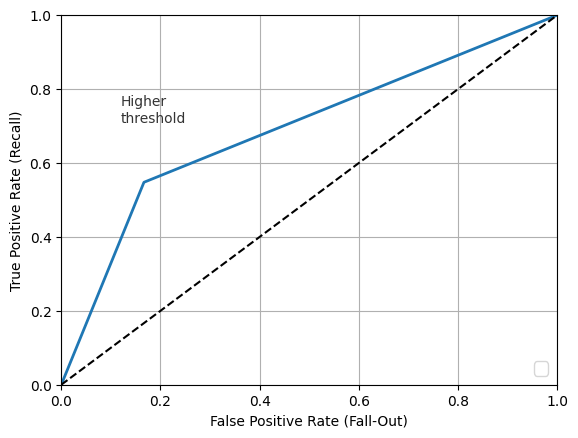

In [31]:
plt.plot(fpr, tpr, linewidth=2, label=None) 

plt.plot([0, 1], [0, 1], 'k--')
plt.text(0.12, 0.71, "Higher\nthreshold", color="#333333")
plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.grid()
plt.axis([0, 1, 0, 1])
plt.legend(loc="lower right", fontsize=13)

plt.show()

One way to compare classifiers is to measure the area under the curve (AUC).

A perfect classifier will have a ROC AUC equal to 1, whereas a purely random classifier will have a ROC AUC equal to 0.5. Scikit-Learn provides a function to compute the ROC AUC

Hands-on ML book

In [32]:
from sklearn.metrics import roc_auc_score

roc_auc_score(train_df_labels, y_train_pred)

0.6905255878284924

Random Forest Classifier

In [33]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
forest_clf.fit(train_prepared, train_df_labels)

y_probas_forest = cross_val_predict(forest_clf, train_prepared, train_df_labels, cv= 3, method = "predict_proba")

In [34]:
prediction = forest_clf.predict(train_prepared)
print("Random Forest Classifire Accuracy of Classifier: ", model.score(train_prepared, train_df_labels))

Random Forest Classifire Accuracy of Classifier:  0.7756874095513748


In [35]:
cross_val_score(forest_clf, train_prepared, train_df_labels, cv= 3, scoring='accuracy')

array([0.78787879, 0.79565217, 0.73043478])

In [36]:
y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class 
fpr_forest, tpr_forest, thresholds_forest = roc_curve(train_df_labels, y_scores_forest)

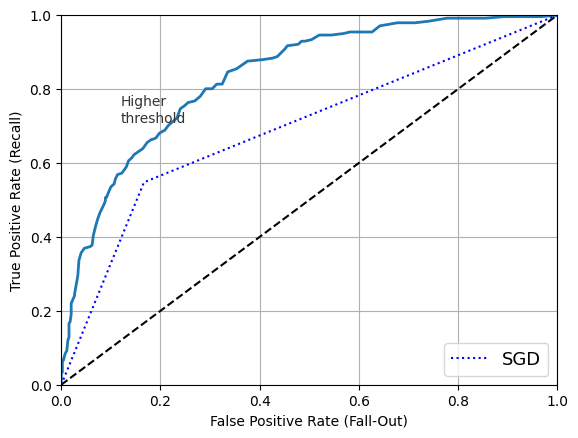

In [37]:
plt.plot(fpr_forest, tpr_forest, linewidth=2, label=None)

plt.plot(fpr, tpr, "b:", label="SGD") 
plt.plot([0, 1], [0, 1], 'k--')
plt.text(0.12, 0.71, "Higher\nthreshold", color="#333333")
plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.grid()
plt.axis([0, 1, 0, 1])
plt.legend(loc="lower right", fontsize=13)


plt.show()

In [38]:
roc_auc_score(train_df_labels, y_train_pred)

0.6905255878284924